## Problem set 4

## Name: Qiuli Lai

## Link to your PS4 github repo: https://github.com/098pipi/data1030_ps4.git

### Problem 0 

-2 points for every missing green OK sign. 

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.13.5

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


## Problem 1

We will work with the recidivism dataset in the problem set. The dataset contains information on criminal offenders screened in Florida from 2013 to 2014. The target variable (`two_year_recid`) for this dataset indicates whether or not an individual committed another crime after being released from prision. The csv file and a description are available in the `data` folder.

You can read more about the topic [here](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) and [here](https://arxiv.org/pdf/2106.05498.pdf). We will work with this dataset again in the context of algorithmic bias towards the end of the term.

You will read in the dataset, prepare the feature matrix and the target variable, perform EDA, and split the dataset into 60% training, 20% validation, and 20% test sets. Follow the steps outlined below.


### Problem 1a (5 points)

In [2]:
# your code here
# import the necessary packages. feel free to use pandas or polars, matplotlib, and sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
# read in the dataset
recid_df = pd.read_csv('data/recidivism_data.csv')
# drop the id and name columns because those are not useful for a machine learning algorithm
recid_ddf = recid_df.drop(columns = ['id', 'name'])
recid_ddf = recid_ddf.dropna(subset=['two_year_recid'])

# prepare the feature matrix X
X = recid_ddf.loc[:, recid_ddf.columns != 'two_year_recid']
# prepare the target variable y
y = recid_ddf['two_year_recid']


### Problem 1b (5 points)

Index(['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree',
       'r_days_from_arrest', 'two_year_recid', 'c_jail_days', 'custody_days'],
      dtype='object')



rows =  7214
columns =  13



sex                    object
age                     int64
age_cat                object
race                   object
juv_fel_count           int64
juv_misd_count          int64
juv_other_count         int64
priors_count            int64
c_charge_degree        object
r_days_from_arrest    float64
two_year_recid          int64
c_jail_days           float64
custody_days          float64
dtype: object



               age  juv_fel_count  juv_misd_count  juv_other_count  \
count  7214.000000    7214.000000     7214.000000      7214.000000   
mean     34.817993       0.067230        0.090934         0.109371   
std      11.888922       0.473972        0.485239         0.501586   
min      18.000000       0.000000        0.

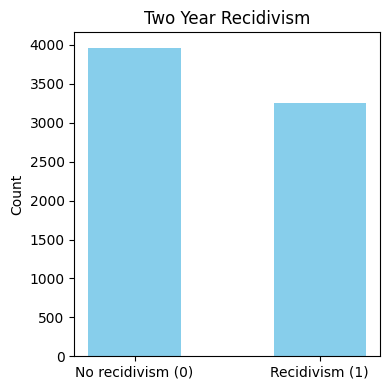

In [3]:
# your code here
# copy-paste the PS3 1a Q0-4 EDA questions here (modify as needed) and answer them.
# **Q0** 
# -------
# First, read the data into a data frame and display the columns of the data frame below. 
print(recid_ddf.columns)

# **Q1** 
# -------
# How many rows and columns do we have in the dataframe?
print('\n\n')
print('rows = ', len(recid_ddf))
print('columns = ', len(recid_ddf.columns))
# **Q2** 
# -------
# What are the data types of the columns? 
print('\n\n')
print(recid_ddf.dtypes)

# **Q3** 
# The ML target variable in this dataset is the two_year_recid. 
# We will develop ML pipelines to predict this variable based on the other features.
# Is this column continuous or categorical? Please use .describe or .value_counts to 
# take a quick look at this feature.
print('\n\n')
print(recid_ddf.describe())

# **Q4** Visualize the target variable.
plt.figure(figsize=(4,4))
counts = recid_ddf['two_year_recid'].value_counts().sort_index()

plt.bar([0,1], counts, color = "skyblue", width = 0.5)
plt.xticks([0,1], ['No recidivism (0)', 'Recidivism (1)'])
plt.title('Two Year Recidivism')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Problem 1c (10 points)

/var/folders/rs/40grxw_n255bd354zxdw3rbw0000gn/T/ipykernel_70535/1638392576.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[4+i].boxplot([df0, df1], labels = ["no recid(0)", "recid(1)"])
/var/folders/rs/40grxw_n255bd354zxdw3rbw0000gn/T/ipykernel_70535/1638392576.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[4+i].boxplot([df0, df1], labels = ["no recid(0)", "recid(1)"])
/var/folders/rs/40grxw_n255bd354zxdw3rbw0000gn/T/ipykernel_70535/1638392576.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[4+i].boxplot([df0, df1], labels = ["no recid(0)", "recid(1)"])


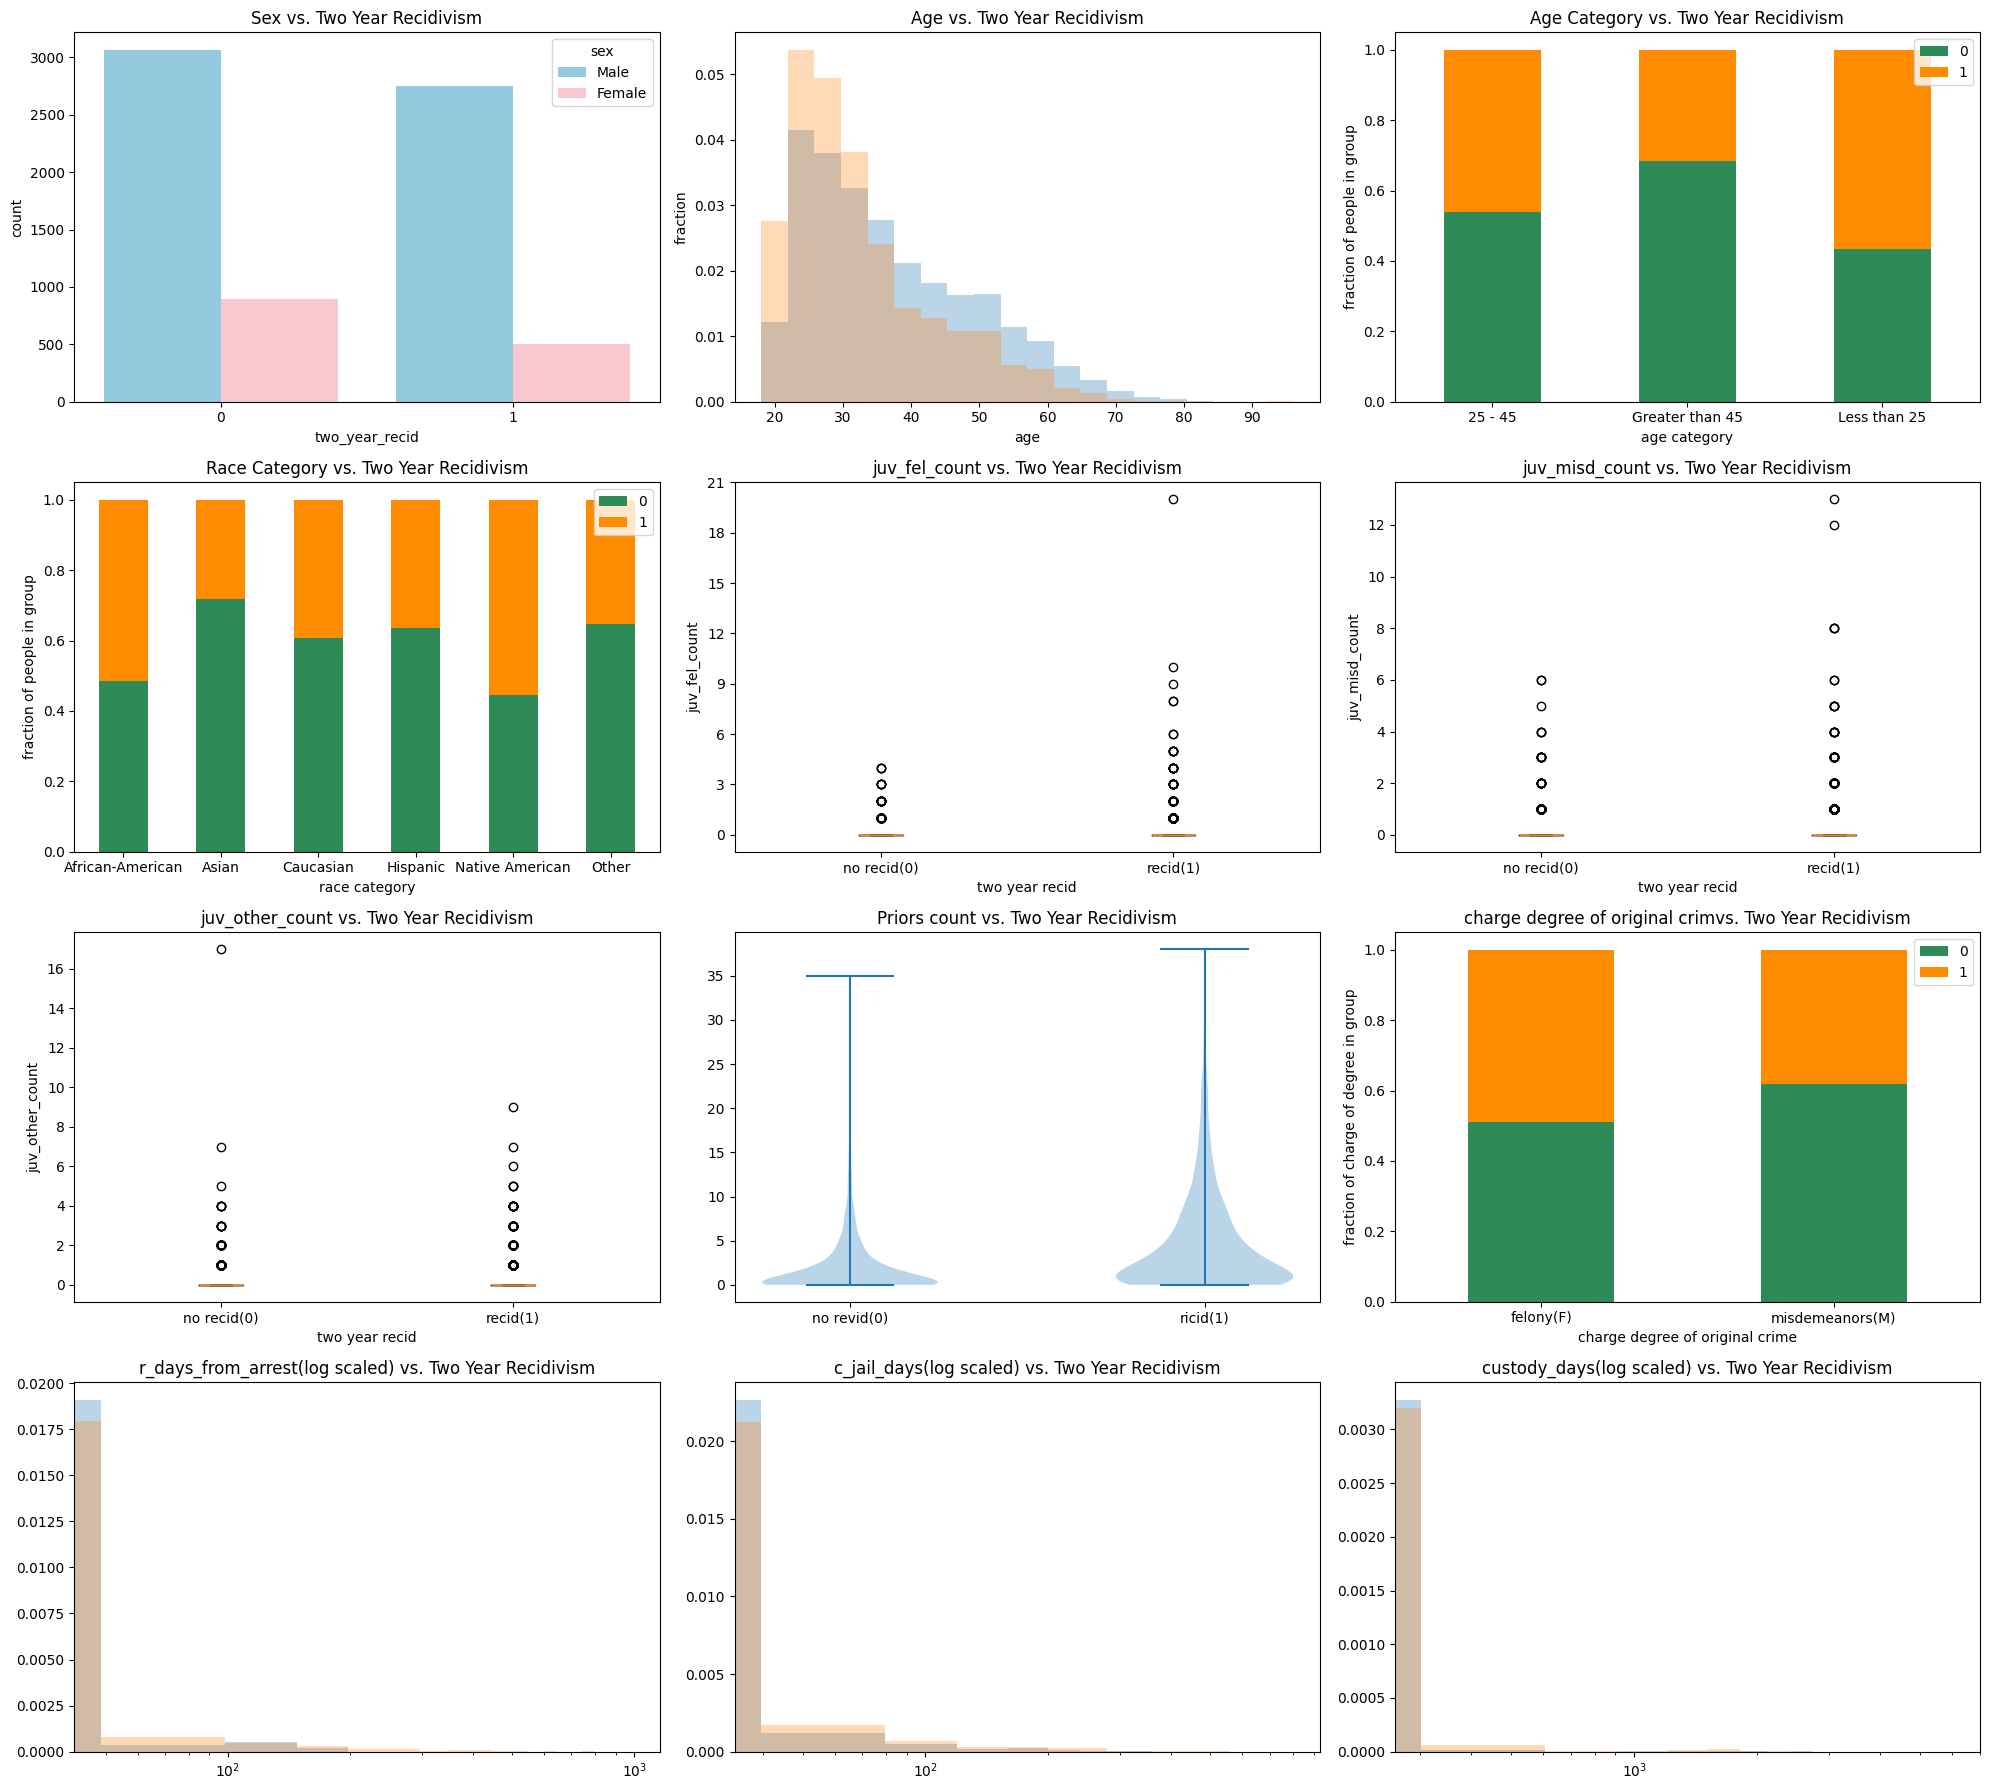

In [4]:
# your code here
import seaborn as sns
# visualize each feature (12 figures total)
fig, axes = plt.subplots(4,3, figsize = (20,18))
axes = axes.flatten()
# figure 1: sex(categorical) vs. two year recid(a binary outcome, so we choose countplot)
sns.countplot(data = recid_ddf, 
              x = 'two_year_recid',  
              hue = 'sex', 
              ax = axes[0],
              palette = {"Male": "skyblue", "Female": "pink"},
              )
axes[0].set_title('Sex vs. Two Year Recidivism')

# figure 2: age(continuous) vs. two year recid(categorical, binary outcome)
bin_range = (recid_ddf['age'].min(), recid_ddf['age'].max())
axes[1].hist(recid_ddf[recid_ddf['two_year_recid'] == 0]['age'], 
             alpha = 0.3,
             range = bin_range,
             bins = 20,
             density = True
             )
axes[1].hist(recid_ddf[recid_ddf['two_year_recid'] == 1]['age'], 
             alpha = 0.3,
             range = bin_range,
             bins = 20,
             density = True
             )
axes[1].set_title('Age vs. Two Year Recidivism')
axes[1].set_xlabel('age')
axes[1].set_ylabel('fraction')

# figure 3: age_cat(categorical) vs two year recid(categorical, binary outcome)
count_matrix = recid_ddf.groupby(['age_cat', 'two_year_recid']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
count_matrix_norm.plot(kind = 'bar', 
                       stacked = True,
                       ax = axes[2],
                       color = ['seagreen', 'darkorange'])
axes[2].set_xlabel('age category')
axes[2].set_ylabel('fraction of people in group')
axes[2].tick_params(axis = "x", labelrotation = 0)
axes[2].legend(loc=1)
axes[2].set_title('Age Category vs. Two Year Recidivism')


# figure 4: race(categorical) vs two year recid(categorical)
count_matrix = recid_ddf.groupby(['race', 'two_year_recid']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
count_matrix_norm.plot(kind = 'bar', 
                       stacked = True,
                       ax = axes[3],
                       color = ['seagreen', 'darkorange'])
axes[3].set_xlabel('race category')
axes[3].set_ylabel('fraction of people in group')
axes[3].tick_params(axis = "x", labelrotation = 0)
axes[3].legend(loc=1)
axes[3].set_title('Race Category vs. Two Year Recidivism')

# figure 5-7: juv_prior_features(continuous) vs two year recid
juv_prior_features = ['juv_fel_count', 'juv_misd_count', 'juv_other_count']
for i in range(0,len(juv_prior_features)):
    df0 = recid_ddf[recid_ddf['two_year_recid'] == 0][juv_prior_features[i]]
    df1 = recid_ddf[recid_ddf['two_year_recid'] == 1][juv_prior_features[i]]
    axes[4+i].boxplot([df0, df1], labels = ["no recid(0)", "recid(1)"])
    axes[4+i].yaxis.set_major_locator(MaxNLocator(integer=True))
    axes[4+i].set_title(f'{juv_prior_features[i]} vs. Two Year Recidivism')
    axes[4+i].set_xlabel('two year recid')
    axes[4+i].set_ylabel(f'{juv_prior_features[i]}')

# figure 8: priors count(continuous) vs two year recid
prior_d = [recid_ddf[recid_ddf['two_year_recid'] == 0]['priors_count'].values, 
           recid_ddf[recid_ddf['two_year_recid'] == 1]['priors_count'].values]
axes[7].violinplot(dataset = prior_d)
axes[7].set_xticks([1,2], ['no revid(0)', 'ricid(1)'])
axes[7].set_xlabel('')
axes[7].set_title('Priors count vs. Two Year Recidivism')

# figure 9: c_charge_degree(categorical, charge degree of original crime, 
# M is misdemeanors, F is felony) vs. two year recid(categorical)
count_matrix2 = recid_ddf.groupby(['c_charge_degree', 'two_year_recid']).size().unstack()
count_matrix2_norm = count_matrix2.div(count_matrix2.sum(axis = 1), axis = 0)
count_matrix2_norm.plot(kind = 'bar', 
                       stacked = True,
                       ax = axes[8],
                       color = ['seagreen', 'darkorange'])
axes[8].set_xlabel('charge degree of original crime')
axes[8].set_xticks([0,1], ['felony(F)', 'misdemeanors(M)'])
axes[8].set_ylabel('fraction of charge of degree in group')
axes[8].tick_params(axis = "x", labelrotation = 0)
axes[8].legend(loc = 1)
axes[8].set_title('charge degree of original crimvs. Two Year Recidivism')

# figure 10-12: r_days_from_arrest
day_range = ['r_days_from_arrest', 'c_jail_days', 'custody_days']
for i in range(0, len(day_range)):

    bin_range_d = (recid_ddf[day_range[i]].min(),
                recid_ddf[day_range[i]].max())
    axes[9+i].hist(recid_ddf[recid_ddf['two_year_recid'] == 0][day_range[i]],
                alpha = 0.3,
                range = bin_range_d,
                bins = 20,
                density = True)
    axes[9+i].hist(recid_ddf[recid_ddf['two_year_recid'] == 1][day_range[i]],
                alpha = 0.3,
                range = bin_range_d,
                bins = 20,
                density = True)
    axes[9+i].set_xscale('log')
    axes[9+i].set_title(f'{day_range[i]}(log scaled) vs. Two Year Recidivism')

fig.tight_layout()
plt.show()
# use sklearn to split the dataset into 60% training, 20% validation, and 20% test sets
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.6, random_state = random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = 0.5, random_state = random_state)

## Problem 2

You will preprocess the dataset in this problem. 

- First, you need to decide based on the dataset description, which features are continuous, ordinal, and categorical.
- Then you will write functions that perform fit-transform on the training set. The functions you create are tested with sklearn. The ability to implement algorithms is a strong indicator that you understand them and it is a crucial step in learning.
- Finally, you'll transform the validation and test sets using sklearn.

Follow the steps outined below.

### Problem 2a (10 points)

In [5]:
# get the categories
recid_ddf['age_cat'].unique()

array(['Greater than 45', '25 - 45', 'Less than 25'], dtype=object)

In [6]:
# import the necesasry packages
import pandas as pd
import polars as pl
from sklearn.preprocessing import StandardScaler

# complete these lists. each feature name must appear exactly once in one of these lists
continuous_ftrs = ['age', 'juv_fel_count','juv_other_count', 'juv_misd_count', 'priors_count', 
                   'r_days_from_arrest', 'c_jail_days', 'custody_days']
ordinal_ftrs = ['age_cat'] 
# for ordinal features, describe the ordered list of categories
ordinal_cats = [['Less than 25', '25 - 45', 'Greater than 45']]
categorical_ftrs = ['sex', 'race', 'c_charge_degree']

def standard_scaler(df, continuous_ftrs):
    '''
    Perfrom StandardScaler fit-transform on the countinuous training set. 
    The standard score of a sample x is calculated as:  z = (x - u) / s
    u:=  the mean of the training samples or zero if with_mean=False
    s:= the standard deviation of the training samples or one if with_std=False

    Parameters
    ----------
    df : pandas.DataFrame or polars.DataFrame
        The input data frame containing continuous features.
    continuous_ftrs : list of str
        List of feature names in 'df' that should be standardized.

    Returns
    -------
    df_scaled : numpy.ndarray
        A 2D array of standardized values with shape (n_samples, n_features).

    Example:
    --------
    >>> from sklearn.preprocessing import StandardScaler
    >>> df = {'salary':[50_000,75_000,40_000,1_000_000,
                           30_000,250_000,35_000,45_000],
              'age': [32,65,13,68,42,75,32], 
              'sex': ['male', 'female', 'female', 'male']}
    >>> continuous_ftrs = ['salary', 'age']
    >>> X_train = df(train[continuous_ftrs])
    >>> scaler = StandardScaler()
    >>> scaler.fit_transform(X_train)

    TODO: the string between triple quotes is called the docstring of a function.
    you saw examples of this in PS3 already.
    now it is your task to write the docstring!
    what does this function do?
    what are the input parameters?
    what are the outputs?
    show in an example how to use the function.
    Follow the docstring structure in PS3.
    '''
    # as in the previous problem set, test the input(s) to the function
    if isinstance(df, pd.DataFrame):
        for ft in continuous_ftrs:
            if not isinstance(df[ft], pd.Series):
                raise ValueError(f"The feature '{ft}' is not a pandas sereis.")
            if not pd.api.types.is_numeric_dtype(df[ft]):
                raise ValueError(f"The feature '{ft}' must be numeric for continuous analysis.")
    elif isinstance(df, pl.DataFrame):
        for ft in continuous_ftrs:
            if not isinstance(df[ft], pl.Series):
                raise ValueError(f"The feature '{ft}' is not a polars sereis.")
            if df.schema[ft] not in (pl.Float64, pl.Float32, pl.Int64, pl.Int32):
                raise ValueError(f"The feature '{ft}' must be numeric for continuous analysis.")

    # implement the standard scaler and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside the function!
    # step 1: 
    # fit: learns the parameters of the training data, 
    # in stdscaler, it learns the mean and the var of each col. in the training data
    # step 2: 
    # transfrom: applied the learned paras. to the transfrom the training data
    dff = df.copy() #avoid revise the original dataframe directly
    df_scaled = []  # a list to store the values of each column
    for ft in continuous_ftrs:
        u = dff[ft].mean()
        s = dff[ft].std(ddof = 0)
        dff[ft] = (dff[ft] - u) / s
        df_scaled.append(dff[ft].values)    # store the values to the list

    return np.column_stack(df_scaled)   # return a 2d numpy array

# test the standard scaler output. call the sklearn standard scaler.
scaled_recid_ddf = standard_scaler(df = recid_ddf, continuous_ftrs = continuous_ftrs)
#apply sklearn's stdscaler
scaler = StandardScaler()
scaler_recid_ddf = scaler.fit_transform(recid_ddf[continuous_ftrs])
# print(scaler_recid_ddf)
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.
if scaler_recid_ddf.any() == scaled_recid_ddf.any():
    print(f"The continuous feature is standardized successfully.")
else:
    raise ValueError(f"The continuous feature failed to be standardized.")

The continuous feature is standardized successfully.


### Problem 2b (10 points)

In [7]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder

def onehot_encoder(df,categorical_ftrs):
    '''
    TODO: write the docstring of the function.
    Follow the docstring structure in PS3.

    encode the categorical features 

    Parameters
    ----------
    df : pandas.DataFrame or polars.DataFrame
        The input data frame containing categorical features.
    categorical_ftrs : list of str
        List of feature names in 'df' that should be one-hot encoded.

    Returns
    -------
    df_onehot : numpy.ndarray
        A 2D array where each categorical feature is expanded into
        one-hot encoded columns. The shape is (n_samples, n_encoded_features).

    Examples:
    --------
    >>> from sklearn.preprocessing import OneHotEncoder
    >>> train = {'gender':['Male','Female','Unknown','Male','Female','Female'],
                 'browser':['Safari','Safari','Internet Explorer','Chrome','Chrome',
                 'Internet Explorer']}
    >>> X_train = pd.DataFrame(train)
    >>> ftrs = ['gender', 'browser']
    >>> # initialize the encoder, # by default, OneHotEncoder returns a sparse matrix. 
    >>> # sparse_output=False returns a 2D array
    >>> enc = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
    >>> enc.onehot_encoder(X_train)    

    '''
    # test the input(s)
    if isinstance(df, pd.DataFrame):
        for ftr in categorical_ftrs:
            if not isinstance(df[ftr], pd.Series):
                raise ValueError(f"The feature '{ftr}' is not a pandas sereis.")
            if not (pd.api.types.is_categorical_dtype(df[ftr]) or 
                    pd.api.types.is_object_dtype(df[ftr]) or 
                    pd.api.types.is_bool_dtype(df[ftr])):
                raise ValueError(f"The feature '{ftr}' is not categorical.")
    elif isinstance(df, pl.DataFrame):
        for ftr in categorical_ftrs:
            if not isinstance(df[ftr], pl.Series):
                raise ValueError(f"The feature '{ftr}' is not a polars sereis.")
            if df[ftr].dtype not in (pl.Categorical, pl.Utf8, pl.Boolean):
                raise ValueError(f"The feature '{ftr}' is not categorical.")

    # implement the algorithm and transform the input
    dff = df.copy()
    df_onehot = []
    for cat in categorical_ftrs:
        ftrs = sorted(dff[cat].unique())
        for ftr in ftrs:
            enc_l = [1 if val==ftr else 0 for val in dff[cat]]
            df_onehot.append(enc_l)

    # you can use numpy, pandas or polars. do not use sklearn inside the function!
    return np.array(df_onehot).T
 
# test the one-hot encoder output. call the sklearn OHE.
enc_recid_dff = onehot_encoder(recid_ddf, categorical_ftrs = categorical_ftrs)
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
skenc_recid_dff = enc.fit_transform(recid_ddf[categorical_ftrs])

if np.allclose(enc_recid_dff,enc_recid_dff):
    print(f"The categorical feature is encoded successfully.")
else:
    raise ValueError(f"The categorical feature failed to be encoded.")
   

The categorical feature is encoded successfully.


/var/folders/rs/40grxw_n255bd354zxdw3rbw0000gn/T/ipykernel_70535/3781797823.py:43: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (pd.api.types.is_categorical_dtype(df[ftr]) or


### Problem 2c (10 points)

In [8]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encoder(df, ordinal_ftrs, ordinal_cats):
    '''
    TODO: write the docstring of the function.
    Follow the docstring structure in PS3.
    Encode categorical features with an intrinsic order into ordinal integers.  
    Each feature is mapped to integers according to the order specified in `ordinal_cats`.

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the categorical features to be encoded.

    ordinal_ftrs : list of str
        A list of column names in 'df' corresponding to the ordinal categorical features.

    ordinal_cats : list of list
        A list where each element specifies the ordered categories for the corresponding 
        feature in 'ordinal_ftrs'. 

    Returns:
    --------
    df_ordinal : numpy.ndarray
        A 2D array where each ordinal feature in 'ordinal_ftrs' is replaced by 
        its encoded integer values. The shape is (n_samples, n_features).

    Examples:
    ---------
    >>> import pandas as pd
    >>> train = {
    ...     'age_cat': ['Less than 25', '25 to 45', 'Greater than 45', 'Less than 25']
    ... }
    >>> X_train = pd.DataFrame(train)
    >>> ordinal_ftrs = ['age_cat']
    >>> ordinal_cats = [['Less than 25', '25 to 45', 'Greater than 45']]
    >>> encoded = ordinal_encoder(X_train, ordinal_ftrs, ordinal_cats)
    >>> print(encoded)
            [[0]
            [1]
            [2]
            [0]]
    
    Notes:
    ------
    - Unlike one-hot encoding, ordinal encoding produces a single column per feature.  
    - The mapping is explicitly defined by 'ordinal_cats', so the ordering of categories 
      must be provided by the user.
    '''

    # test the input(s)

    if isinstance(df, pd.DataFrame):
        for ftr in categorical_ftrs:
            if not isinstance(df[ftr], pd.Series):
                raise ValueError(f"The feature '{ftr}' is not a pandas Series.")

            if not (
                pd.api.types.is_categorical_dtype(df[ftr]) or
                pd.api.types.is_object_dtype(df[ftr]) or
                pd.api.types.is_bool_dtype(df[ftr])
            ):
                raise ValueError(f"The feature '{ftr}' must be categorical (categorical, object, or boolean dtype).")

    elif isinstance(df, pl.DataFrame):
        for ftr in categorical_ftrs:
            if not isinstance(df[ftr], pl.Series):
                raise ValueError(f"The feature '{ftr}' is not a polars Series.")
            
            if df[ftr].dtype not in (pl.Categorical, pl.Utf8, pl.Boolean):
                raise ValueError(f"The feature '{ftr}' must be categorical (Categorical, Utf8, or Boolean dtype).")


    # implement the algorithm and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside the function!
    dff = df.copy()
    df_ordinal = []
    for of in ordinal_ftrs:
        rank = ordinal_cats[ordinal_ftrs.index(of)]
        for val in dff[of]:
            if val in rank:
                df_ordinal.append(rank.index(val))
    return np.array(df_ordinal).reshape(-1, 1)

# test the ordinal encoder output. call the sklearn OE.
ordenc_recid_ddf = ordinal_encoder(recid_ddf, ordinal_ftrs=ordinal_ftrs, 
                                   ordinal_cats=ordinal_cats)
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.
enc = OrdinalEncoder(categories = ordinal_cats)
enc.fit(recid_ddf[ordinal_ftrs])
ordinal_train = enc.transform(recid_ddf[ordinal_ftrs])
# now, please combine your three functions to create a df that is fully transformed
# test this
if ordenc_recid_ddf.any() == ordinal_train.any():
    print(f"The categorical feature is encoded successfully based on the given rank/order.")
else:
    raise ValueError(f"The categorical feature failed to be encoded  based on the given rank/order.")
   


The categorical feature is encoded successfully based on the given rank/order.


/var/folders/rs/40grxw_n255bd354zxdw3rbw0000gn/T/ipykernel_70535/1274665848.py:60: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(df[ftr]) or


### Problem 2d (5 points)

In [9]:
# test 1: use the sklearn transformers you prepared to test your functions and transform the train/validation/test sets.
# make sure that the transformed train you prepared is identical to the sklearn transformed training set
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_ftrs),
        ('std', StandardScaler(), continuous_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_sk = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# handsratched trans
X_train_std = standard_scaler(X_train, continuous_ftrs)
X_train_ohe = onehot_encoder(X_train, categorical_ftrs)
X_train_ord = ordinal_encoder(X_train, ordinal_ftrs, ordinal_cats)

# Then concatenate everything together (order must match sklearn!)
X_train_final = np.concatenate([X_train_ord, X_train_ohe, X_train_std], axis=1)

# get sklearn feature names
sklearn_headers = preprocessor.get_feature_names_out()
print("Sklearn headers:", sklearn_headers)

# your hand-scratched headers (match same order)
ohe_feature_names = [f"onehot__{col}_{cat}" for col in categorical_ftrs for cat in sorted(X_train[col].unique())]
ord_feature_names = [f"ord__{col}" for col in ordinal_ftrs]
std_feature_names = [f"std__{col}" for col in continuous_ftrs]
headers = ord_feature_names + ohe_feature_names + std_feature_names

print("\n\nTransformed feature headers:", headers)

# test 3: make sure they are identical
if np.allclose(X_train_sk, X_train_final, equal_nan=True):
    print("The training set is transformed successfully.\n")
else:
    raise ValueError("Mismatch between sklearn and hand-scratched transformers.")



Sklearn headers: ['ord__age_cat' 'onehot__sex_Female' 'onehot__sex_Male'
 'onehot__race_African-American' 'onehot__race_Asian'
 'onehot__race_Caucasian' 'onehot__race_Hispanic'
 'onehot__race_Native American' 'onehot__race_Other'
 'onehot__c_charge_degree_F' 'onehot__c_charge_degree_M' 'std__age'
 'std__juv_fel_count' 'std__juv_other_count' 'std__juv_misd_count'
 'std__priors_count' 'std__r_days_from_arrest' 'std__c_jail_days'
 'std__custody_days']


Transformed feature headers: ['ord__age_cat', 'onehot__sex_Female', 'onehot__sex_Male', 'onehot__race_African-American', 'onehot__race_Asian', 'onehot__race_Caucasian', 'onehot__race_Hispanic', 'onehot__race_Native American', 'onehot__race_Other', 'onehot__c_charge_degree_F', 'onehot__c_charge_degree_M', 'std__age', 'std__juv_fel_count', 'std__juv_other_count', 'std__juv_misd_count', 'std__priors_count', 'std__r_days_from_arrest', 'std__c_jail_days', 'std__custody_days']
The training set is transformed successfully.



/var/folders/rs/40grxw_n255bd354zxdw3rbw0000gn/T/ipykernel_70535/3781797823.py:43: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (pd.api.types.is_categorical_dtype(df[ftr]) or
/var/folders/rs/40grxw_n255bd354zxdw3rbw0000gn/T/ipykernel_70535/1274665848.py:60: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(df[ftr]) or
